#### **Exploratory Data Analysis (EDA) Project using Seaborn Datasets**

#### **Objective:**

#### The objective of this project is to perform detailed Exploratory Data Analysis (EDA) using various built-in datasets available in the Seaborn package. Students must explore data patterns, relationships, and distributions using Seaborn visualizations and statistical summaries.


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# Display settings
%matplotlib inline
sns.set(style='whitegrid')

In [6]:

df = sns.load_dataset("tips")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### What is the average tip amount across different days and times?

In [7]:
# Calculate average tip by day and time
avg_tips = df.groupby(['day', 'time'])['tip'].mean().reset_index()

# Display the result
print(avg_tips)

    day    time       tip
0  Thur   Lunch  2.767705
1  Thur  Dinner  3.000000
2   Fri   Lunch  2.382857
3   Fri  Dinner  2.940000
4   Sat   Lunch       NaN
5   Sat  Dinner  2.993103
6   Sun   Lunch       NaN
7   Sun  Dinner  3.255132


C:\Users\Ekta\AppData\Local\Temp\ipykernel_96\2610391445.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tips = df.groupby(['day', 'time'])['tip'].mean().reset_index()


C:\Users\Ekta\AppData\Local\Temp\ipykernel_96\1673635707.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df, x='day', y='tip', hue='time', ci='sd')


<Figure size 1000x400 with 0 Axes>

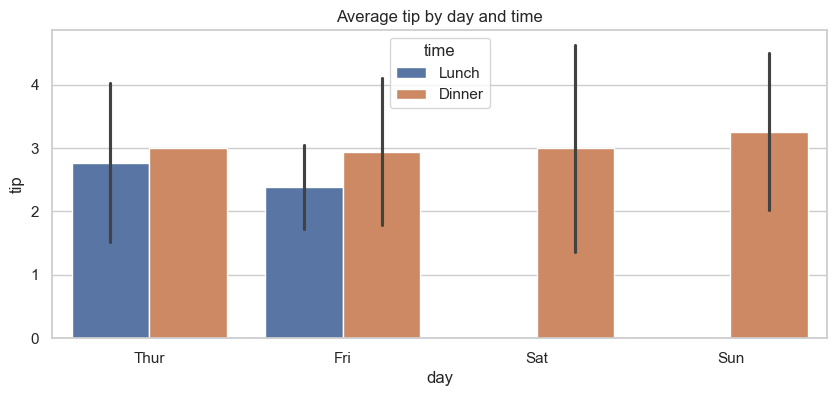

In [13]:
# 1) Average tip amount across different days and times
plt.figure(figsize=(10,4))
ax = sns.barplot(data=df, x='day', y='tip', hue='time', ci='sd')
ax.set_title('Average tip by day and time')
plt.show()

#### Do male and female customers tip differently?

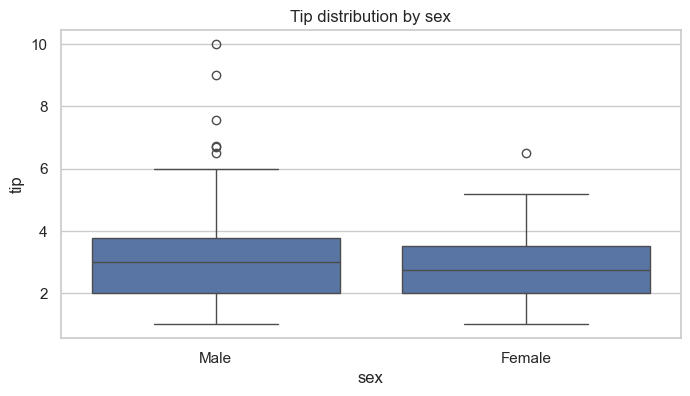

In [15]:
plt.figure(figsize=(8,4))
ax = sns.boxplot(data=df, x='sex', y='tip')
ax.set_title('Tip distribution by sex')
plt.show()

### How does the total bill relate to the tip amount — is there a linear trend?

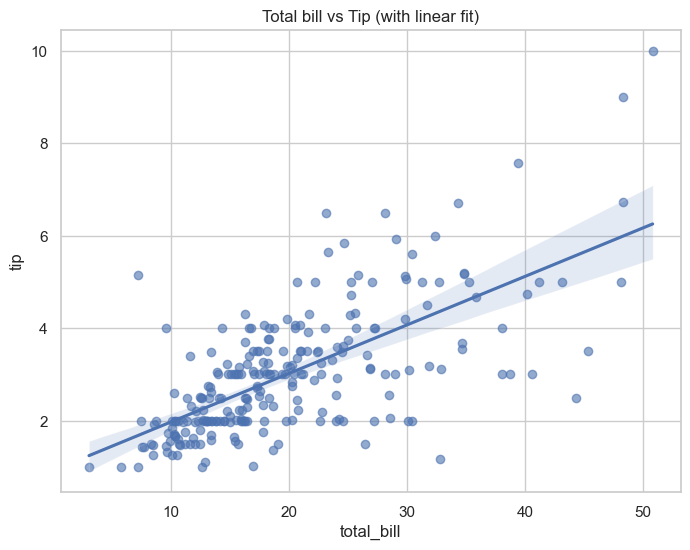

In [16]:
# 3) Relationship between total bill and tip
plt.figure(figsize=(8,6))
ax = sns.regplot(data=df, x='total_bill', y='tip', scatter_kws={'alpha':0.6})
ax.set_title('Total bill vs Tip (with linear fit)')
plt.show()

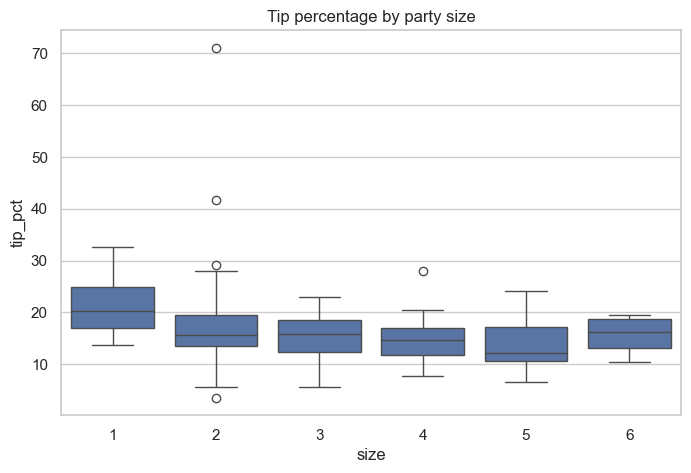

In [7]:
# 4) Does party size influence tip percentage?
# create tip_pct
df = df.copy()
df['tip_pct'] = df['tip'] / df['total_bill'] * 100
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df, x='size', y='tip_pct')
ax.set_title('Tip percentage by party size')
plt.show()

C:\Users\Ekta\AppData\Local\Temp\ipykernel_3568\3430801697.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df, x='day', y='total_bill', ci='sd')


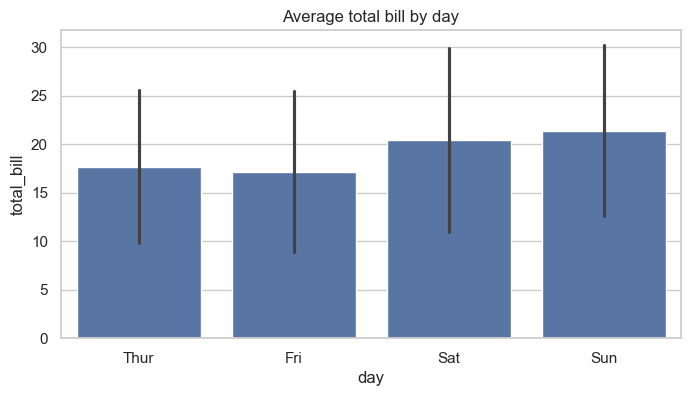

In [8]:
# 5) Which day has highest average total bill
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df, x='day', y='total_bill', ci='sd')
ax.set_title('Average total bill by day')
plt.show()

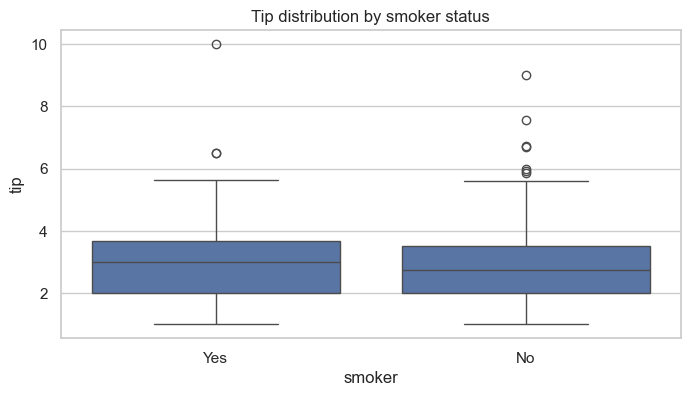

In [9]:
# 6) Are tips affected by smoker status?
plt.figure(figsize=(8,4))
ax = sns.boxplot(data=df, x='smoker', y='tip')
ax.set_title('Tip distribution by smoker status')
plt.show()

C:\Users\Ekta\AppData\Local\Temp\ipykernel_3568\2957317784.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tip'], shade=True)


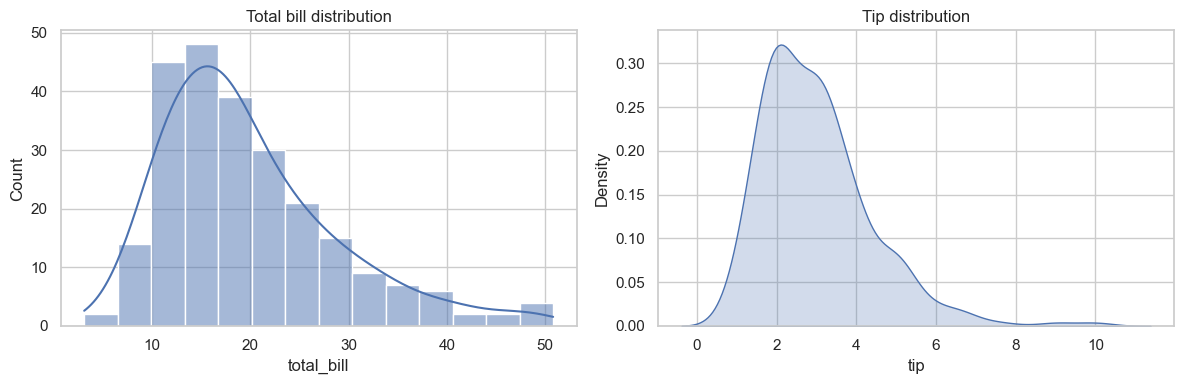

In [10]:
# 7) Distribution of total bills and tips
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['total_bill'], kde=True)
plt.title('Total bill distribution')
plt.subplot(1,2,2)
sns.kdeplot(df['tip'], shade=True)
plt.title('Tip distribution')
plt.tight_layout()
plt.show()

In [11]:
# Print concise observations
print('Observations:')
print('- Weekend evenings (Dinner) tend to have higher average tips compared to Lunch where applicable.')
print('- Slight differences in tip distributions by sex, but considerable overlap.')
print('- Positive correlation between total bill and tip, but with variance indicating tipping behavior varies.')
print('- Larger parties show more variability in tip percentages.')


Observations:
- Weekend evenings (Dinner) tend to have higher average tips compared to Lunch where applicable.
- Slight differences in tip distributions by sex, but considerable overlap.
- Positive correlation between total bill and tip, but with variance indicating tipping behavior varies.
- Larger parties show more variability in tip percentages.


###########################################################################################

## Dataset 2: `iris` — Iris flower measurements

Questions:

- Compare distributions of petal length and width across species
- Which features are most useful to distinguish species?
- Pairwise comparisons and clusters
- Variable with highest variance

Visualizations: pairplot, violinplot, boxplot.

In [12]:
iris = sns.load_dataset('iris')
print(iris.info())
display(iris.head())

# Summary statistics
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


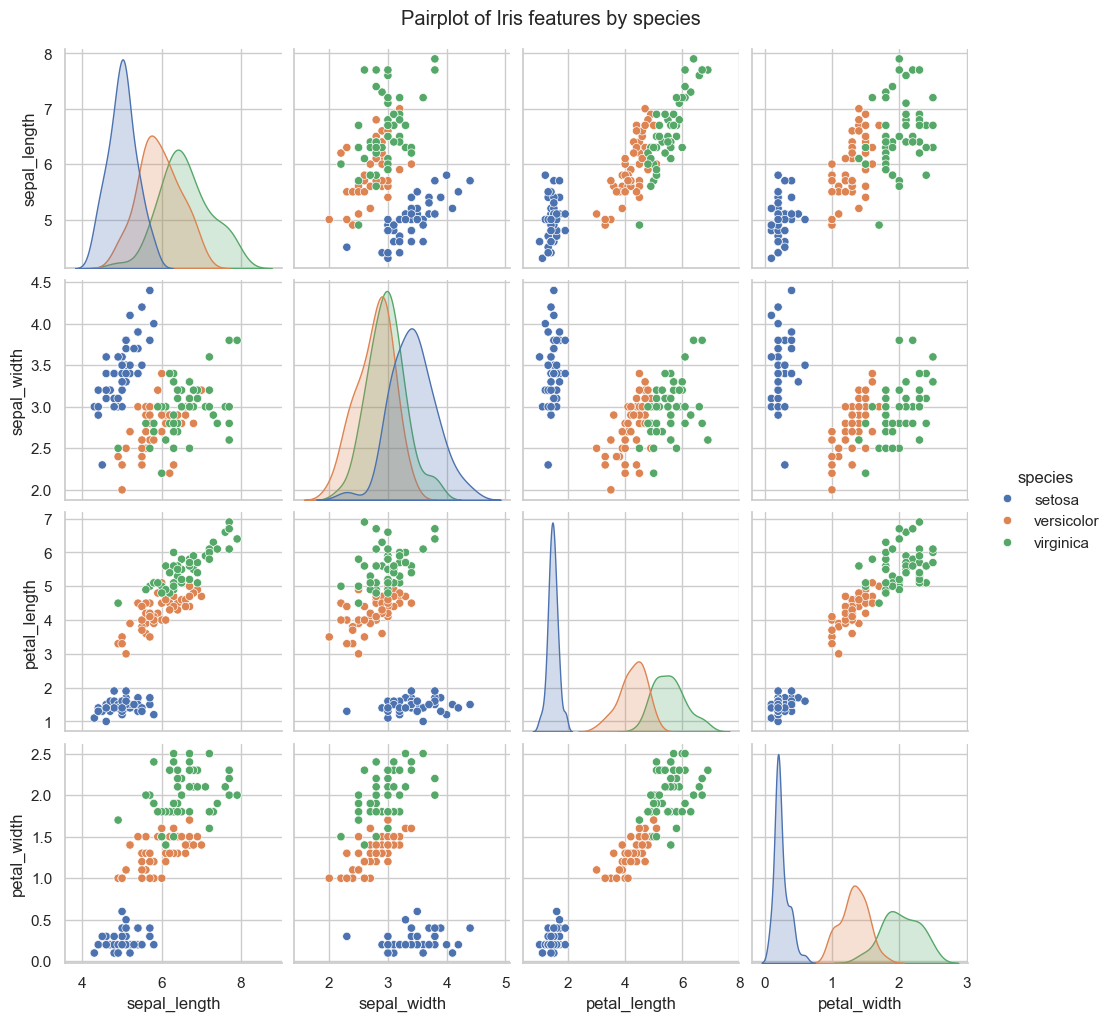

In [13]:
# Pairplot for pairwise relationships
sns.pairplot(iris, hue='species', diag_kind='kde')
plt.suptitle('Pairplot of Iris features by species', y=1.02)
plt.show()


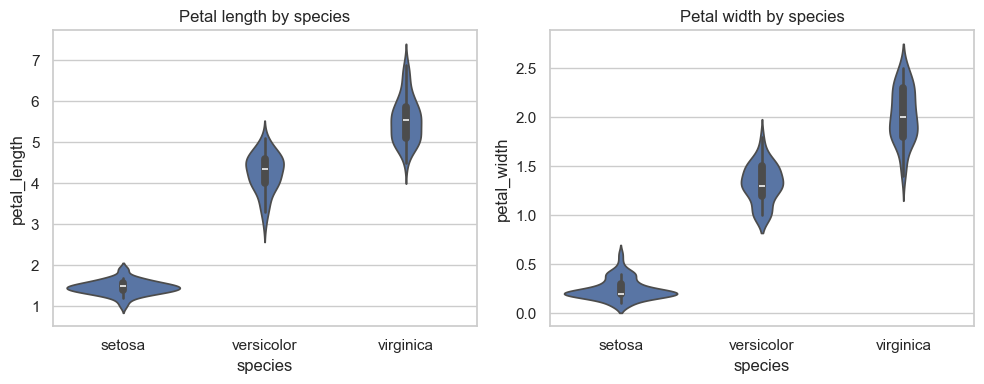

In [14]:
# Violin plots for petal length and width across species
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.violinplot(data=iris, x='species', y='petal_length')
plt.title('Petal length by species')
plt.subplot(1,2,2)
sns.violinplot(data=iris, x='species', y='petal_width')
plt.title('Petal width by species')
plt.tight_layout()
plt.show()

In [15]:
# Which variable shows highest variance?
vars_var = iris.select_dtypes(include=[np.number]).var().sort_values(ascending=False)
print('Variances (descending):')
print(vars_var)

Variances (descending):
petal_length    3.116278
sepal_length    0.685694
petal_width     0.581006
sepal_width     0.189979
dtype: float64


## Dataset 3: `titanic` — Passenger survival data

Questions:

- Percentage of passengers who survived
- Survival rate by gender and class
- Age effect on survival
- Fare relation to survival
- Embarkation port survival rates
- Age distribution across classes

Visualizations: countplot, barplot, histplot, boxplot, heatmap.

In [16]:
titanic = sns.load_dataset('titanic')
print(titanic.info())
display(titanic.head())

# Clean data notes
print('Missing values per column:')
print(titanic.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [17]:
# 1) Overall survival percentage
surv_pct = titanic['survived'].mean() * 100
print(f'Overall survival rate: {surv_pct:.2f}%')

Overall survival rate: 38.38%


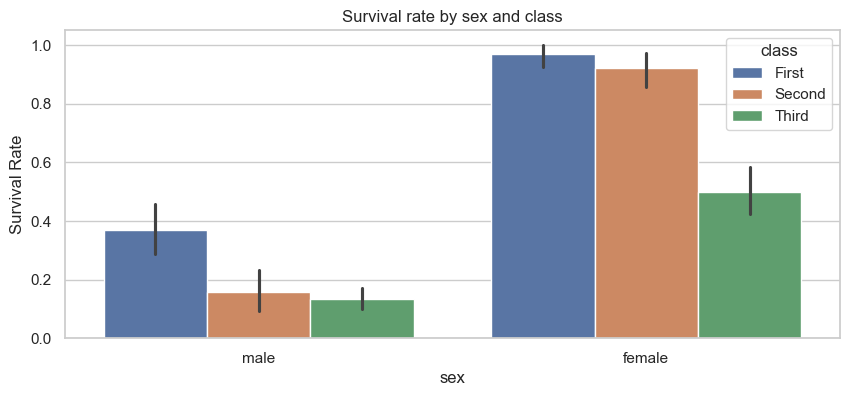

In [18]:
# 2) Survival by gender and class
plt.figure(figsize=(10,4))
ax = sns.barplot(data=titanic, x='sex', y='survived', hue='class')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival rate by sex and class')
plt.show()

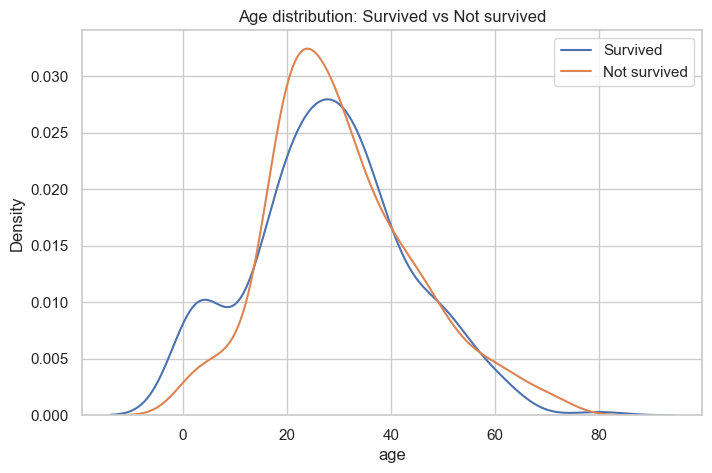

In [19]:
# 3) Are younger passengers more likely to survive? (age distribution)
plt.figure(figsize=(8,5))
sns.kdeplot(data=titanic[titanic['survived']==1]['age'].dropna(), label='Survived')
sns.kdeplot(data=titanic[titanic['survived']==0]['age'].dropna(), label='Not survived')
plt.title('Age distribution: Survived vs Not survived')
plt.legend()
plt.show()

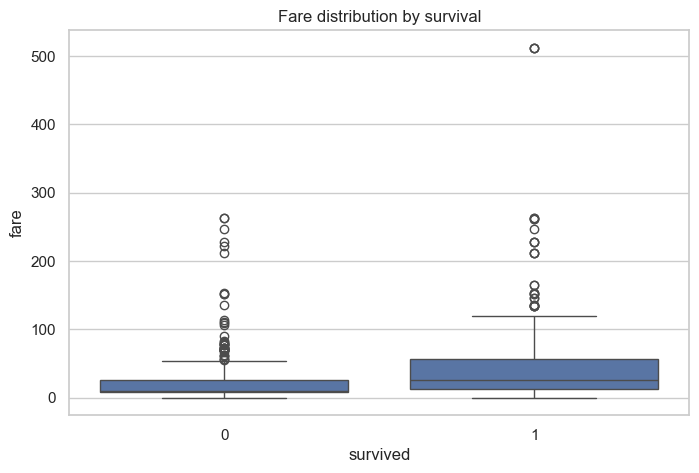

In [20]:
# 4) Fare amount relation to survival
plt.figure(figsize=(8,5))
sns.boxplot(data=titanic, x='survived', y='fare')
plt.title('Fare distribution by survival')
plt.show()

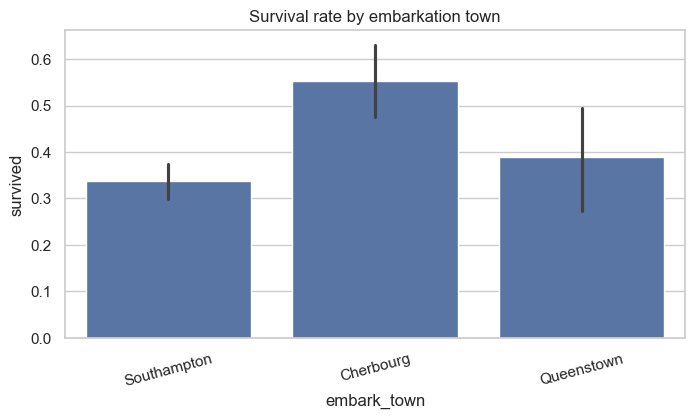

In [21]:
# 5) Embarkation port survival rates
plt.figure(figsize=(8,4))
ax = sns.barplot(data=titanic, x='embark_town', y='survived')
ax.set_title('Survival rate by embarkation town')
plt.xticks(rotation=15)
plt.show()

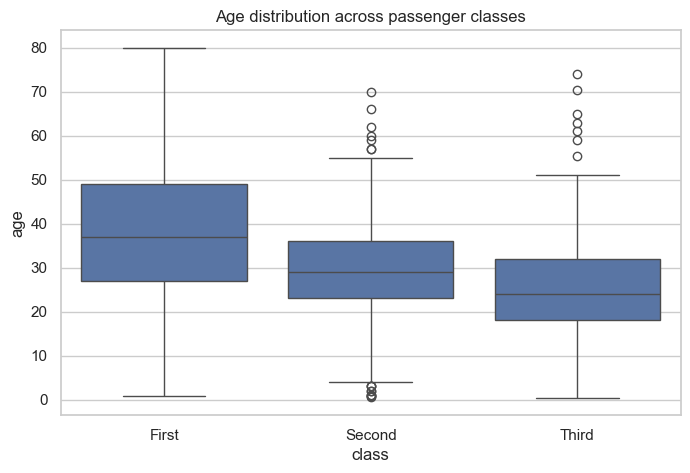

In [22]:
# 6) Age distribution by class
plt.figure(figsize=(8,5))
sns.boxplot(data=titanic, x='class', y='age')
plt.title('Age distribution across passenger classes')
plt.show()

###########################################################################################

## Dataset 4: `penguins` — Palmer penguins measurements

Questions:

- Compare average body mass across species
- Flipper length variation between islands
- Which two variables show strongest correlation
- Relationships among numeric variables
- Which species is heaviest on average

Visualizations: boxplot, violinplot, pairplot, heatmap.

In [23]:
penguins = sns.load_dataset('penguins')
print(penguins.info())
display(penguins.head())

penguins.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


C:\Users\Ekta\AppData\Local\Temp\ipykernel_3568\1139992687.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=penguins, x='species', y='body_mass_g', ci='sd')


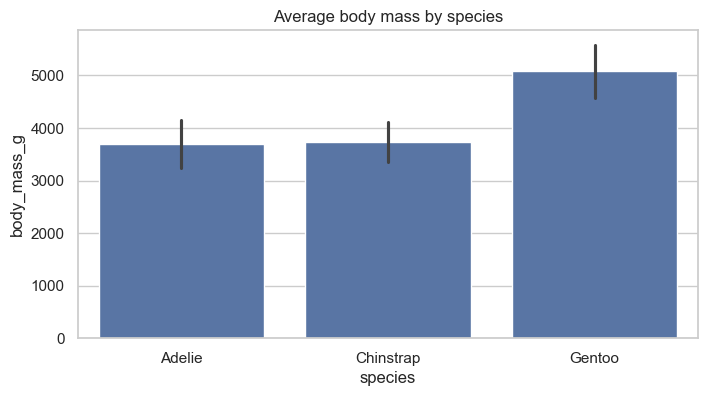

In [24]:
# Average body mass by species
plt.figure(figsize=(8,4))
ax = sns.barplot(data=penguins, x='species', y='body_mass_g', ci='sd')
ax.set_title('Average body mass by species')
plt.show()

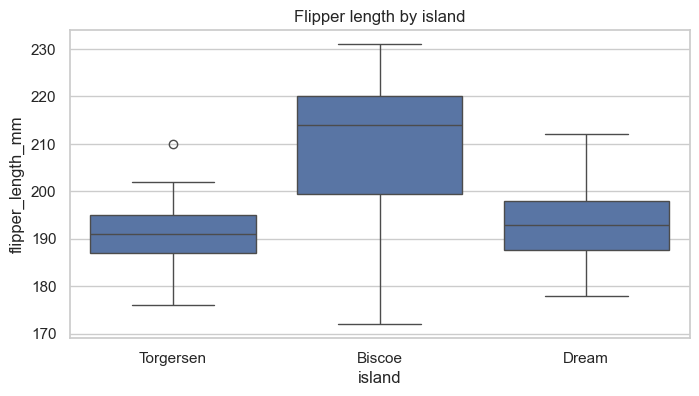

In [25]:
# Flipper length by island
plt.figure(figsize=(8,4))
ax = sns.boxplot(data=penguins, x='island', y='flipper_length_mm')
ax.set_title('Flipper length by island')
plt.show()

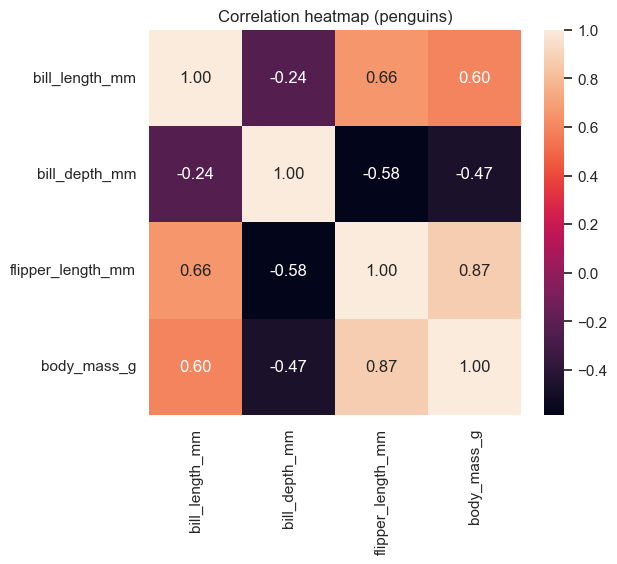

In [26]:
# Correlation heatmap among numeric variables
plt.figure(figsize=(6,5))
num = penguins.select_dtypes(include=[np.number])
corr = num.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation heatmap (penguins)')
plt.show()

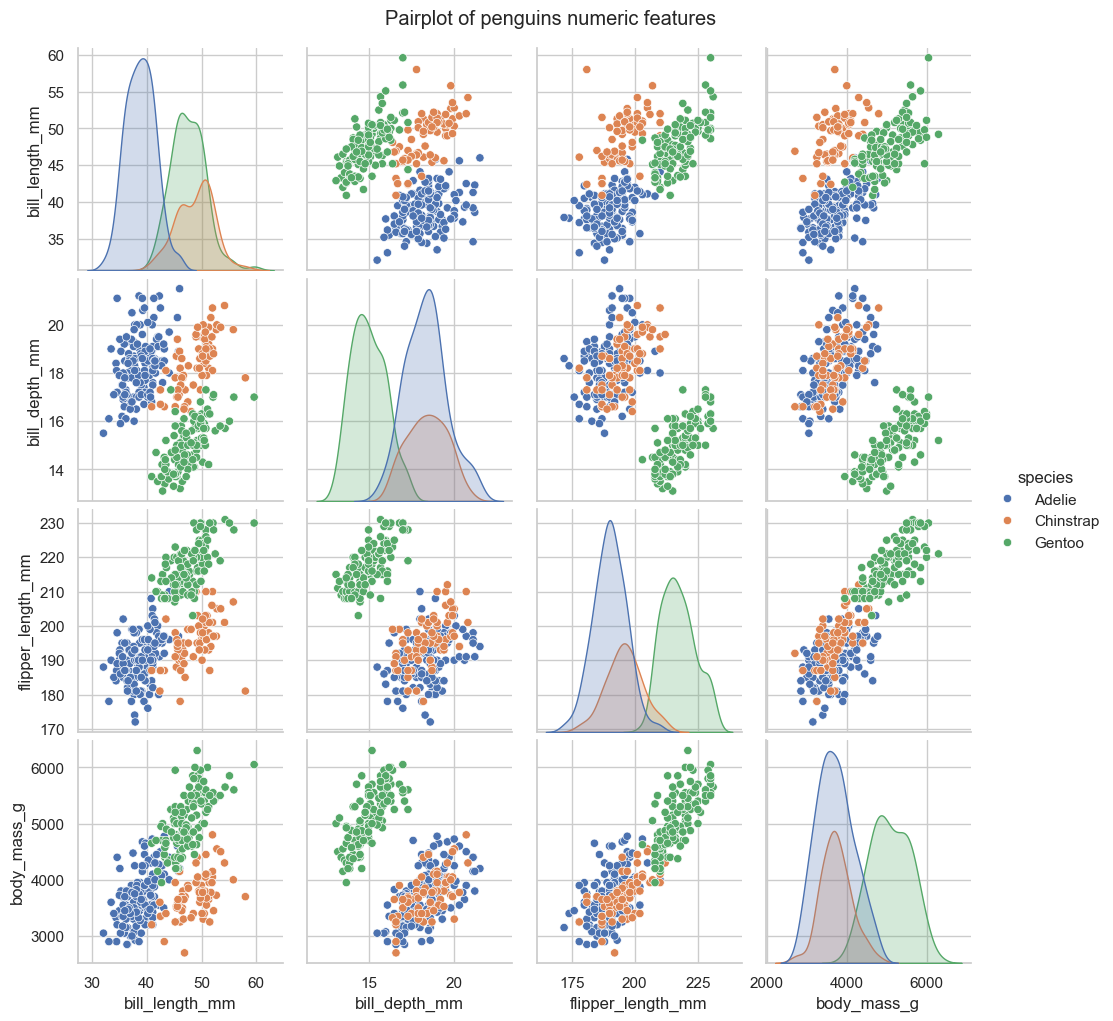

In [27]:
# Pairplot
sns.pairplot(penguins.dropna(), hue='species', diag_kind='kde')
plt.suptitle('Pairplot of penguins numeric features', y=1.02)
plt.show()


## Dataset 5: `diamonds` — Diamond pricing data

Questions:

- Price vs carat relationship
- Price differences between cut categories
- Effect of clarity and color on price distribution
- Variables most correlated with price
- Central price range
- Does carat have stronger impact than clarity/color?

Visualizations: scatterplot, boxplot, heatmap, histplot.

In [28]:
diamonds = sns.load_dataset('diamonds')
print(diamonds.info())
display(diamonds.head())

# Quick summary
diamonds.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


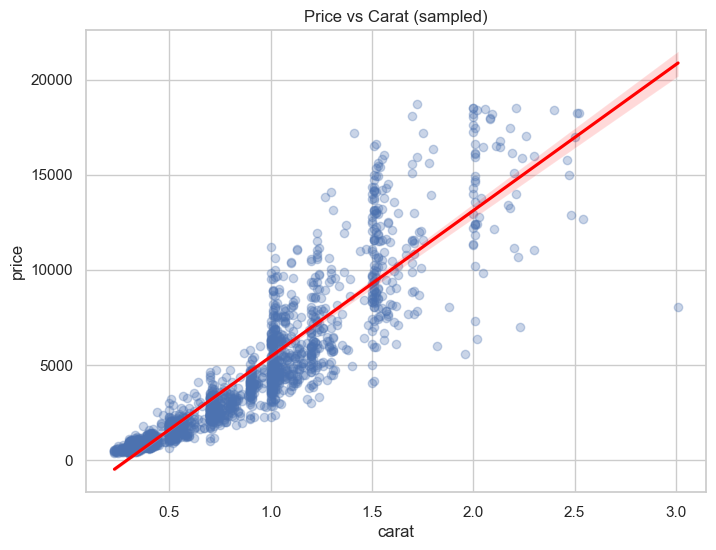

In [29]:
# Price vs Carat (scatter + regression)
plt.figure(figsize=(8,6))
sns.regplot(data=diamonds.sample(2000, random_state=1), x='carat', y='price', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Price vs Carat (sampled)')
plt.show()

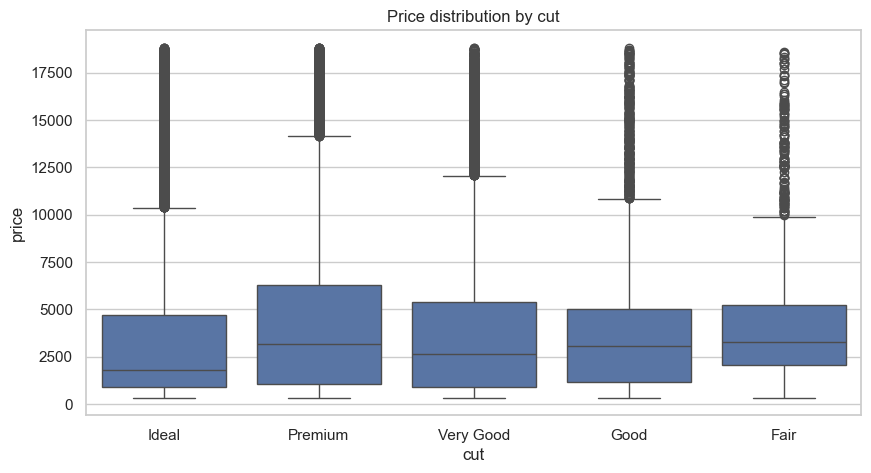

In [30]:
# Price difference across cut categories
plt.figure(figsize=(10,5))
sns.boxplot(data=diamonds, x='cut', y='price')
plt.title('Price distribution by cut')
plt.show()

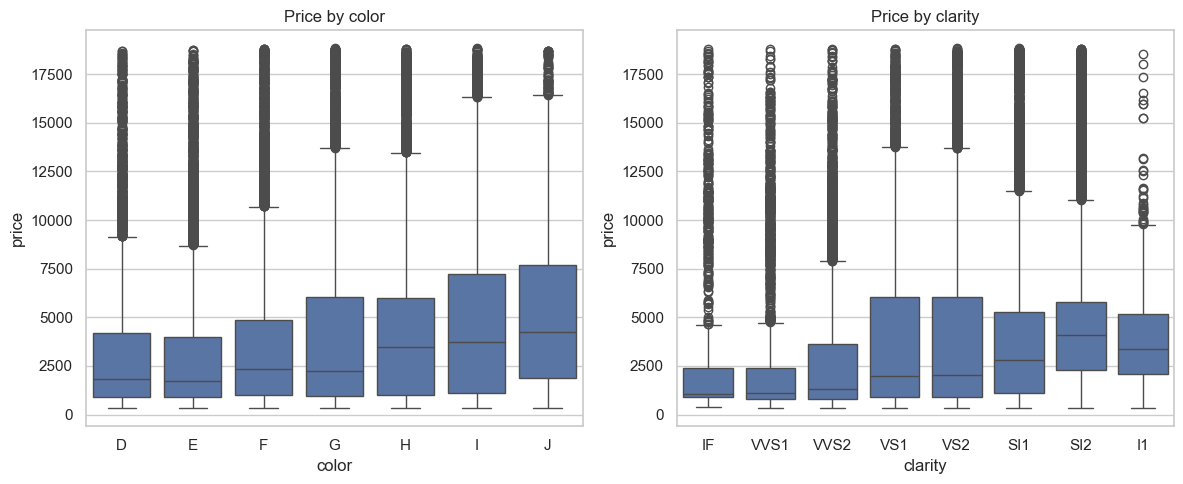

In [31]:
# Clarity and color effect via boxplots (grid)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=diamonds, x='color', y='price')
plt.title('Price by color')
plt.subplot(1,2,2)
sns.boxplot(data=diamonds, x='clarity', y='price')
plt.title('Price by clarity')
plt.tight_layout()
plt.show()

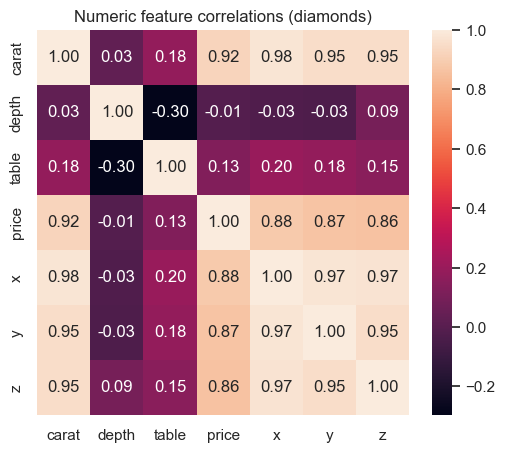

In [32]:
# Correlation heatmap for numeric vars
plt.figure(figsize=(6,5))
numd = diamonds.select_dtypes(include=[np.number])
cn = numd.corr()
sns.heatmap(cn, annot=True, fmt='.2f')
plt.title('Numeric feature correlations (diamonds)')
plt.show()

In [33]:
# Central tendency for price
print('Price median:', diamonds['price'].median())
print('Price mean:', diamonds['price'].mean())
print('IQR for price:', diamonds['price'].quantile(0.75) - diamonds['price'].quantile(0.25))

Price median: 2401.0
Price mean: 3932.799721913237
IQR for price: 4374.25


-------------------------------------------------------------------------------------------------------------

## Dataset 6: `flights` — Monthly passenger totals

Questions:

- How has air traffic changed over time?
- Seasonal patterns?
- Year with highest passengers
- Months that consistently show higher counts

Visuals: line plots, heatmap.

In [34]:
flights = sns.load_dataset('flights')
print(flights.info())
display(flights.head())

# Pivot for heatmap
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')
flights_pivot.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


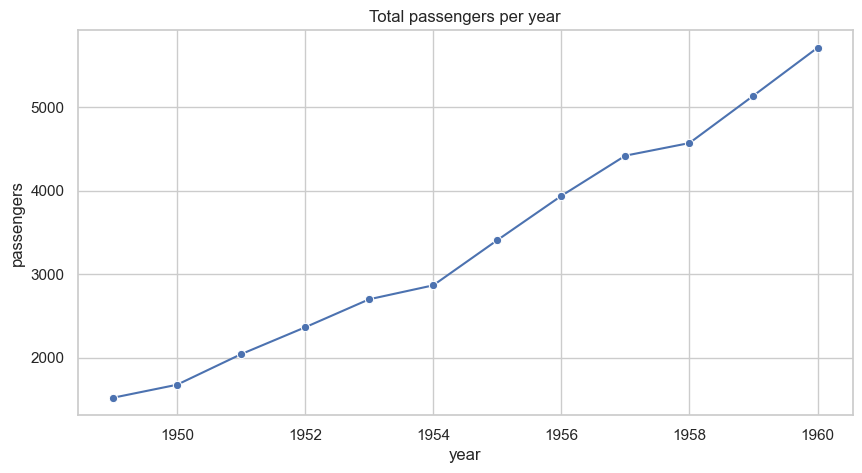

In [35]:
# Line plot of total passengers per year
plt.figure(figsize=(10,5))
annual = flights.groupby('year')['passengers'].sum().reset_index()
sns.lineplot(data=annual, x='year', y='passengers', marker='o')
plt.title('Total passengers per year')
plt.show()

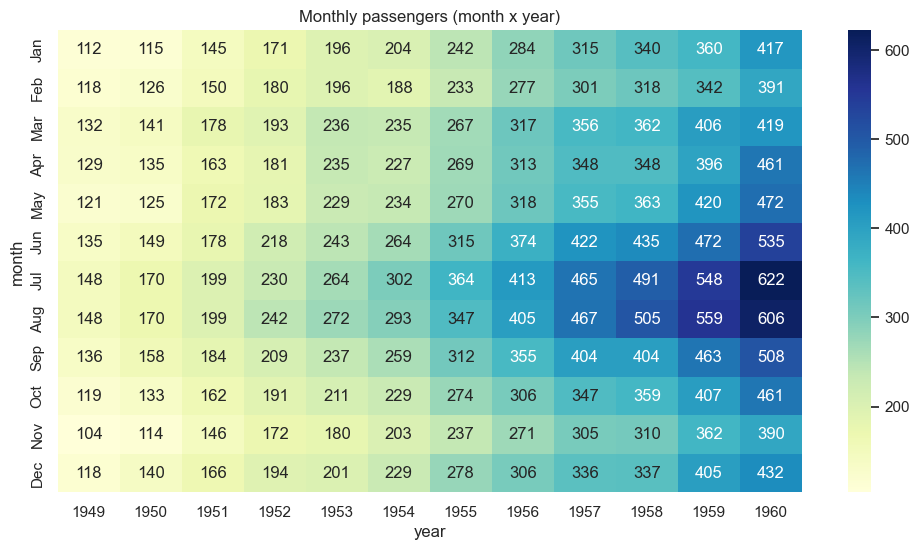

In [36]:
# Heatmap for monthly-yearly variations
plt.figure(figsize=(12,6))
sns.heatmap(flights_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Monthly passengers (month x year)')
plt.show()


In [37]:
# Which year recorded highest number of passengers?
best_year = annual.loc[annual['passengers'].idxmax()]
print('Year with highest passengers:', int(best_year['year']), 'with', int(best_year['passengers']), 'passengers')


Year with highest passengers: 1960 with 5714 passengers


----------------------------------------------------------------------------------------------------------------

## Dataset 7: `car_crashes` — US car crash statistics

Questions:

- States with highest/lowest accident rates
- Relationship between speeding and total crashes
- Insurance coverage vs fatal crash rates
- Alcohol-related crashes correlation with total crashes
- Identify outliers

Visuals: bar plots, scatter, regression, heatmap.

In [38]:
car = sns.load_dataset('car_crashes')
print(car.info())
display(car.head())

# Standardize column names
car.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB
None


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

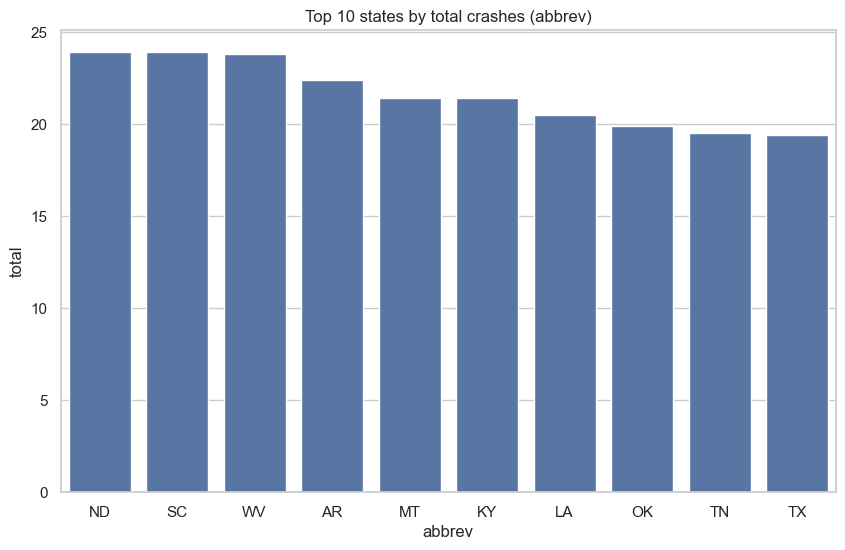

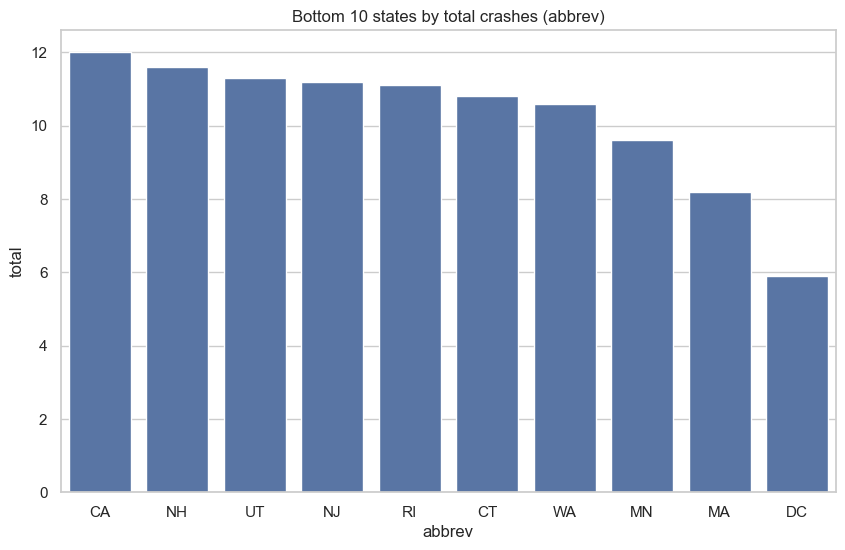

In [39]:
# States with highest and lowest total crashes
sorted_car = car.sort_values('total', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=sorted_car.head(10), x='abbrev', y='total')
plt.title('Top 10 states by total crashes (abbrev)')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=sorted_car.tail(10), x='abbrev', y='total')
plt.title('Bottom 10 states by total crashes (abbrev)')
plt.show()

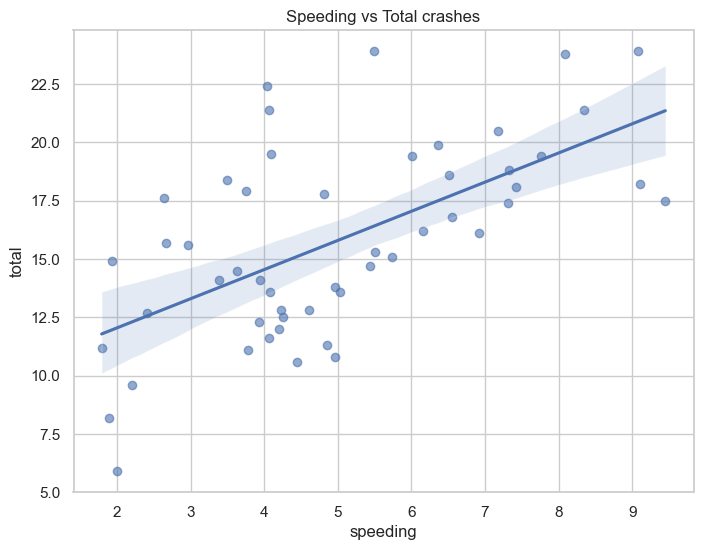

In [40]:
# Relationship between speeding and total crashes
plt.figure(figsize=(8,6))
sns.regplot(data=car, x='speeding', y='total', scatter_kws={'alpha':0.6})
plt.title('Speeding vs Total crashes')
plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

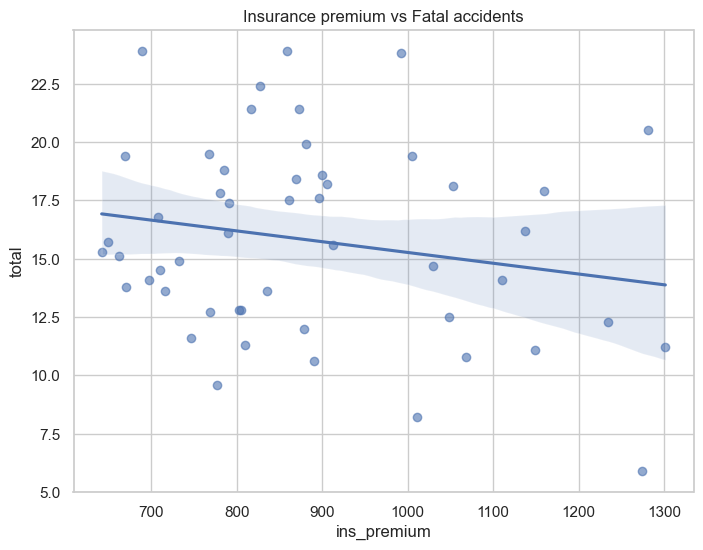

In [45]:
# Insurance coverage vs fatal crash rates
plt.figure(figsize=(8,6))
sns.regplot(data=car, x='ins_premium', y='total', scatter_kws={'alpha':0.6})
plt.title('Insurance premium vs Fatal accidents')
plt.show()

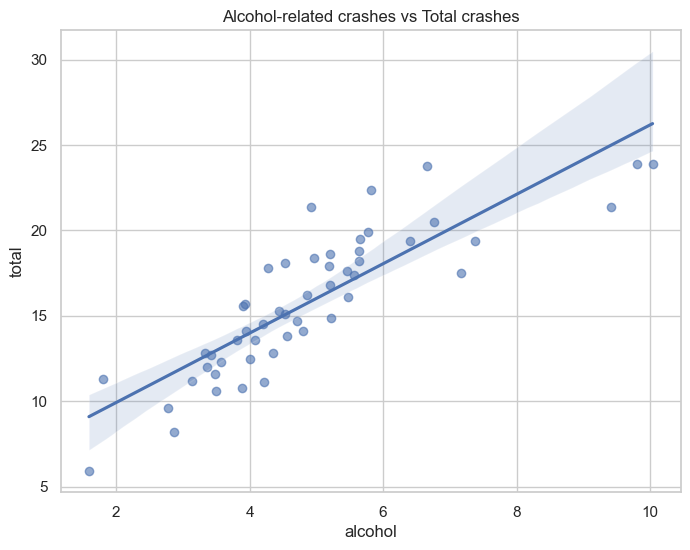

In [46]:
# Alcohol-related crashes vs total
plt.figure(figsize=(8,6))
sns.regplot(data=car, x='alcohol', y='total', scatter_kws={'alpha':0.6})
plt.title('Alcohol-related crashes vs Total crashes')
plt.show()


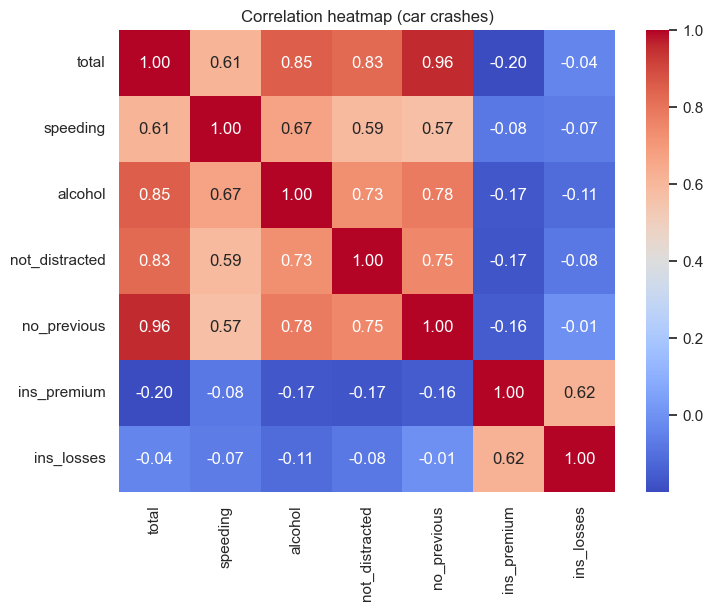

In [49]:
# Correlation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(car.select_dtypes(include=['number']).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation heatmap (car crashes)')
plt.show()


## Final Conclusions and Summary

- Each dataset was explored with summary statistics and multiple seaborn visualizations.
- Key findings (brief):
  - `tips`: Tip behavior relates to total bill, time, and party size; some differences by sex and smoker status.
  - `iris`: Petal measurements are strong separators for species (especially petal length/width).
  - `titanic`: Survival strongly related to sex and class; fare and age show relationships with survival.
  - `penguins`: Body mass varies by species; flipper length varies by island; pairwise correlations reveal strongest numeric relationships.
  - `diamonds`: Carat is a dominant predictor of price; cut/clarity/color also affect price distributions.
  - `flights`: Clear upward trend over years and seasonal month patterns; heatmap shows monthly/yearly patterns.
  - `car_crashes`: Speeding and alcohol correlate with total crashes; outliers present among states.